In [1]:
import pandas as pd

In [2]:
!ls

dataset-preperation.ipynb		      train_ne_cdhit.aac.csv
logs.log				      train_ne_cdhit.atc.csv
Model.ipynb				      train_ne_cdhit.btc.csv
peptide-dataset-combined-aac-atc-btc-pcp.csv  train_ne_cdhit.pcp.csv
train-combined-cdhit-aac.csv		      train_po_cdhit.aac.csv
train-combined-cdhit-atc.csv		      train_po_cdhit.atc.csv
train-combined-cdhit-btc.csv		      train_po_cdhit.btc.csv
train-combined-cdhit-pcp.csv		      train_po_cdhit.pcp.csv


In [3]:
df = pd.read_csv('peptide-dataset-combined-aac-atc-btc-pcp.csv')
df

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,0.273,0.182,0.364,0.818,0.182,-0.345,-0.827,0.489,-0.479,0.230
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.091,0.364,0.727,0.909,0.091,1.312,-1.478,2.019,-0.696,-1.419
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.455,0.364,0.091,0.455,0.545,-0.231,-0.213,0.410,-0.286,0.289
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.455,0.364,0.091,0.455,0.545,-0.315,-0.150,0.329,-0.167,0.075
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,0.545,0.273,0.091,0.455,0.545,-0.326,0.174,0.717,-0.619,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,0.433,0.100,0.267,0.400,0.600,0.193,-0.368,-0.596,0.286,0.145
2755,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.300,0.200,0.333,0.433,0.567,0.058,-1.056,-0.479,-0.250,0.257
2756,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,0.233,0.267,0.433,0.700,0.300,0.092,-1.202,0.436,-0.352,-0.416
2757,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,0.367,0.200,0.133,0.500,0.500,0.271,0.178,-0.369,-0.252,-0.074


In [4]:
from pycaret.classification import *

In [5]:
data = df.sample(frac=0.95,random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2621, 60)
Unseen Data For Predictions: (138, 60)


In [6]:
exp = setup(data=data,target='class')

,Description,Value
0,session_id,4384
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2621, 60)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7454,0.8113,0.7590,0.7258,0.7418,0.4909,0.4917,5.1690
et,Extra Trees Classifier,0.7328,0.7153,0.7082,0.7301,0.7186,0.4644,0.4650,0.2460
gbc,Gradient Boosting Classifier,0.7290,0.8024,0.7534,0.7050,0.7281,0.4586,0.4599,0.6630
xgboost,Extreme Gradient Boosting,0.7252,0.7793,0.7184,0.7137,0.7157,0.4498,0.4501,31.2940
rf,Random Forest Classifier,0.7214,0.7672,0.7082,0.7123,0.7101,0.4419,0.4421,0.3160
ridge,Ridge Classifier,0.7181,0.0000,0.7523,0.6903,0.7191,0.4372,0.4402,0.0180
lightgbm,Light Gradient Boosting Machine,0.7170,0.7877,0.7194,0.7013,0.7100,0.4338,0.4342,0.1840
lr,Logistic Regression,0.7165,0.7863,0.7398,0.6925,0.7146,0.4334,0.4355,0.4370
knn,K Neighbors Classifier,0.7148,0.7787,0.7284,0.6947,0.7109,0.4298,0.4306,0.0390
ada,Ada Boost Classifier,0.7143,0.7687,0.7273,0.6941,0.7099,0.4287,0.4297,0.1650


In [8]:
print(best_model)

In [9]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7554,0.8237,0.7865,0.7292,0.7568,0.5116,0.5130
1,0.7446,0.8276,0.7753,0.7188,0.7459,0.4899,0.4913
2,0.7500,0.8164,0.7303,0.7471,0.7386,0.4991,0.4992
3,0.7174,0.7847,0.7528,0.6907,0.7204,0.4358,0.4374
4,0.7705,0.8295,0.7955,0.7447,0.7692,0.5415,0.5426
5,0.7377,0.7830,0.7727,0.7083,0.7391,0.4764,0.4782
6,0.7322,0.7912,0.7273,0.7191,0.7232,0.4639,0.4639
7,0.7541,0.8247,0.7386,0.7471,0.7429,0.5073,0.5073
8,0.7814,0.8415,0.7955,0.7609,0.7778,0.5629,0.5635
9,0.7104,0.7906,0.7159,0.6923,0.7039,0.4206,0.4209


In [10]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7554,0.8202,0.8315,0.7115,0.7668,0.5129,0.5198
1,0.7391,0.8226,0.7865,0.7071,0.7447,0.4796,0.4824
2,0.7283,0.7966,0.7303,0.7143,0.7222,0.4563,0.4564
3,0.7337,0.7769,0.7640,0.7083,0.7351,0.4681,0.4695
4,0.7322,0.8069,0.7386,0.7143,0.7263,0.4644,0.4646
5,0.7213,0.7801,0.7955,0.6796,0.7330,0.4453,0.4513
6,0.6776,0.7609,0.6932,0.6559,0.6740,0.3556,0.3561
7,0.7869,0.8426,0.8068,0.7634,0.7845,0.5740,0.5749
8,0.7814,0.8577,0.8295,0.7449,0.7849,0.5640,0.5674
9,0.7432,0.8033,0.7955,0.7071,0.7487,0.4879,0.4915


In [11]:
print(tuned_catboost)

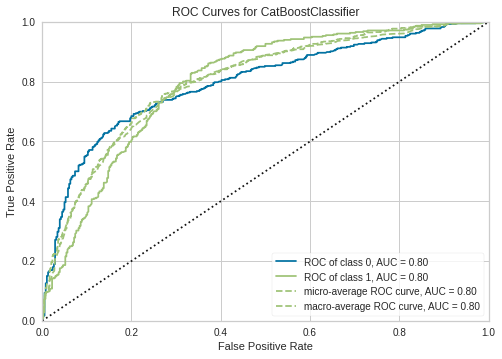

In [12]:
plot_model(tuned_catboost, plot = 'auc')

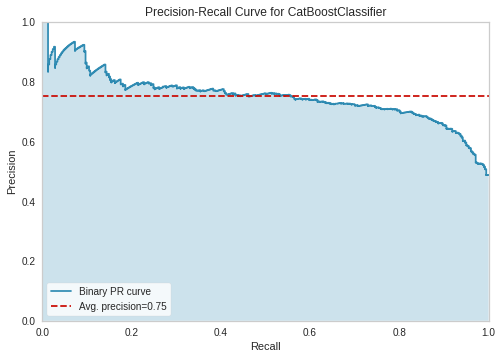

In [13]:
plot_model(tuned_catboost, plot = 'pr')

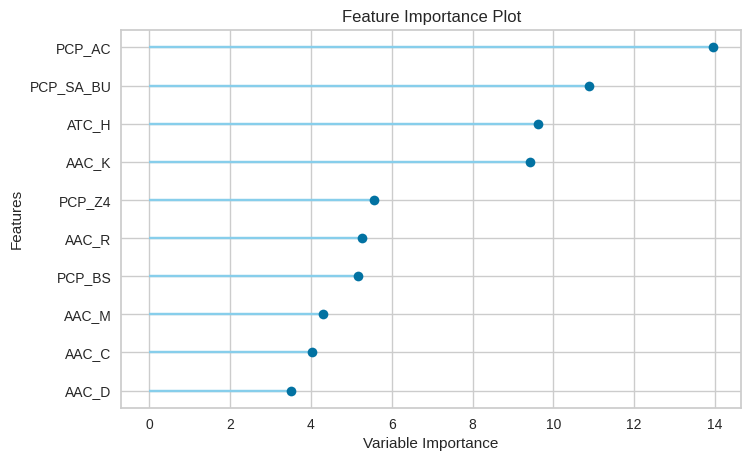

In [14]:
plot_model(tuned_catboost, plot='feature')

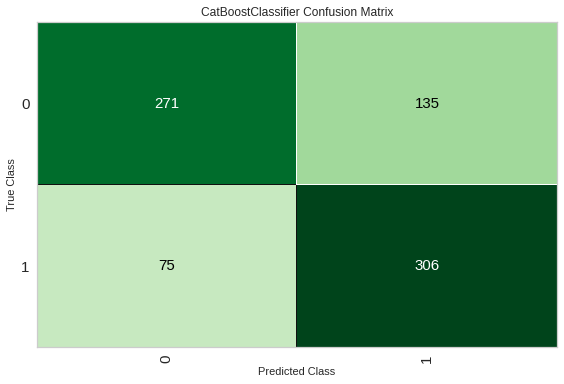

In [15]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

In [16]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7332,0.7966,0.8031,0.6939,0.7445,0.4684,0.4739


In [18]:
final_catboost = finalize_model(tuned_catboost)

In [19]:
print(final_catboost)

In [20]:
predict_model(final_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7789,0.8562,0.8451,0.7368,0.7873,0.5594,0.5651


In [21]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,Label,Score
0,0.00,0.0,9.09,18.18,9.09,9.09,0.00,0.00,0.00,9.09,...,0.091,0.545,0.455,-0.178,-0.243,0.481,-0.745,0.135,0,0.7528
1,18.18,0.0,0.00,0.00,0.00,18.18,9.09,0.00,18.18,9.09,...,0.455,0.545,0.455,0.970,-1.049,-0.744,0.363,0.352,1,0.7351
2,0.00,0.0,0.00,0.00,0.00,0.00,0.00,18.18,9.09,36.36,...,0.182,0.273,0.727,-1.233,-0.872,-1.290,-0.484,0.451,1,0.6212
3,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8.33,25.00,...,0.250,0.583,0.417,-0.732,-0.355,0.008,-0.450,0.478,0,0.5036
4,7.69,0.0,0.00,0.00,7.69,23.08,0.00,7.69,7.69,38.46,...,0.385,0.385,0.615,-1.418,-1.613,-0.597,-0.492,0.383,1,0.7254


In [25]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['class'],unseen_predictions['Label'],metric='Accuracy')

0.7319

In [26]:
save_model(final_catboost,'final-catboost-17032021-peptide')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='class')),
                 ('fix_perfect', Remove_100(target='class')),
                 ('clean_names', Cl